In [162]:
import numpy as np
import pandas as pd 
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

%matplotlib inline

import seaborn as sns
from subprocess import check_output



In [2]:
df = pd.read_csv('nyc_taxi_data_2014.csv', low_memory = False)
df.head(5)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,1,N,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,1,N,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,1,N,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,1,N,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,1,N,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75


In [3]:
# show each column data types
df.dtypes

vendor_id              object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
rate_code               int64
store_and_fwd_flag     object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type           object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtype: object

In [10]:
# show data frame size
df.shape
### shape(14999999, 18)


# because the number of records is too big,
# only take a fraction of dataframe for EDA

df_sampled = df.sample(frac= 0.15, random_state = 1996)

In [11]:
df_sampled.to_csv('sampled_data.csv', index = False)

# 1. Read sampled data

In [6]:
df = pd.read_csv('sampled_data.csv', 
                 usecols=['vendor_id','pickup_datetime','dropoff_datetime','passenger_count',
                          'trip_distance','pickup_longitude','pickup_latitude','rate_code',
                          'store_and_fwd_flag','dropoff_longitude','dropoff_latitude','payment_type',
                          'fare_amount','surcharge','mta_tax','tip_amount','tolls_amount',
                          'total_amount'])
df.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-01-31 10:37:00,2014-01-31 10:56:00,1,1.05,-73.997702,40.765297,1,NaN,-73.990915,40.756022,CSH,12.5,0.0,0.5,0.00,0.00,13.00
1,CMT,2014-01-15 18:22:18,2014-01-15 18:25:53,1,0.80,-73.995762,40.756551,1,N,-73.988268,40.759026,CRD,4.5,1.0,0.5,0.00,0.00,6.00
2,CMT,2014-01-08 10:36:06,2014-01-08 10:41:38,1,1.10,-73.970193,40.784265,1,N,-73.959408,40.775362,CSH,6.0,0.0,0.5,0.00,0.00,6.50
3,CMT,2014-01-15 19:21:56,2014-01-15 19:38:09,1,3.50,-73.990207,40.756280,1,N,-73.972896,40.797807,CSH,14.0,1.0,0.5,0.00,0.00,15.50
4,CMT,2014-01-16 12:25:47,2014-01-16 12:33:20,1,2.10,-73.955242,40.788409,1,N,-73.980673,40.777228,CRD,8.5,0.0,0.5,1.80,0.00,10.80
5,VTS,2014-01-27 12:10:00,2014-01-27 12:23:00,1,2.29,-73.993458,40.762982,1,NaN,-74.008020,40.736192,CRD,10.5,0.0,0.5,2.00,0.00,13.00
6,CMT,2014-01-14 10:26:20,2014-01-14 10:58:24,1,10.70,-73.865783,40.770928,1,N,-73.972321,40.758443,CRD,33.0,0.0,0.5,7.75,5.33,46.58
7,CMT,2014-01-14 13:42:50,2014-01-14 13:55:49,1,2.10,-73.965600,40.768482,1,N,-73.981305,40.778530,CSH,11.0,0.0,0.5,0.00,0.00,11.50
8,CMT,2014-01-31 23:26:19,2014-02-01 00:00:50,2,5.90,-73.981027,40.741922,1,N,-73.954928,40.722459,CRD,25.0,0.5,0.5,4.00,0.00,30.00
9,CMT,2014-01-22 05:39:17,2014-01-22 05:41:55,1,0.50,-74.005377,40.725777,1,N,-73.997251,40.722556,CSH,4.0,0.5,0.5,0.00,0.00,5.00


In [34]:
df.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_day,pickup_hour,pickup_month,trip_duration
count,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.249974e+06,2.249974e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06,2.250000e+06
mean,1.701520e+00,2.791107e+00,-7.297671e+01,4.019883e+01,1.033823e+00,-7.291575e+01,4.016604e+01,1.200951e+01,3.144085e-01,4.982267e-01,1.456734e+00,2.398685e-01,1.451972e+01,4.038536e+00,1.356524e+01,1.081214e+00,7.390748e+02
std,1.377253e+00,3.327835e+00,8.544777e+00,4.738984e+00,7.314979e-01,8.806473e+00,4.884301e+00,1.004651e+01,3.632659e-01,2.972410e-02,2.235680e+00,1.188906e+00,1.215127e+01,1.909130e+00,6.435469e+00,2.731632e-01,9.838507e+02
min,0.000000e+00,0.000000e+00,-1.800000e+02,-1.800000e+02,0.000000e+00,-7.353500e+02,-1.800000e+02,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-9.305670e+05
25%,1.000000e+00,1.000000e+00,-7.399197e+01,4.073541e+01,1.000000e+00,-7.399135e+01,4.073423e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00,3.000000e+00,9.000000e+00,1.000000e+00,3.600000e+02
50%,1.000000e+00,1.700000e+00,-7.398182e+01,4.075304e+01,1.000000e+00,-7.398004e+01,4.075342e+01,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,1.000000e+00,6.000000e+02
75%,2.000000e+00,3.070000e+00,-7.396736e+01,4.076726e+01,1.000000e+00,-7.396349e+01,4.076841e+01,1.350000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.610000e+01,6.000000e+00,1.900000e+01,1.000000e+00,9.600000e+02
max,2.080000e+02,1.000000e+02,0.000000e+00,6.741905e+01,2.100000e+02,0.000000e+00,4.040833e+02,5.000000e+02,5.000000e+00,5.000000e-01,1.500000e+02,2.000000e+01,5.000000e+02,7.000000e+00,2.300000e+01,2.000000e+00,1.160520e+05


In [119]:
df.isnull().sum()

vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
rate_code                   0
store_and_fwd_flag    1144763
dropoff_longitude          26
dropoff_latitude           26
payment_type                0
fare_amount                 0
surcharge                   0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
pickup_day                  0
pickup_hour                 0
pickup_month                0
trip_duration               0
weekday                     0
month                       0
dtype: int64

# 2. Features Extraction

In [27]:
# Extracting hour, week day and month from dataset

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df["pickup_day"] = df["pickup_datetime"].dt.strftime('%u').astype(int) #weekday
df["pickup_hour"] = df["pickup_datetime"].dt.strftime('%H').astype(int) #hour
df["pickup_month"] = df["pickup_datetime"].dt.strftime('%m').astype(int) #month

In [28]:
# Extract trip duration
df['trip_duration'] = (df.dropoff_datetime - df.pickup_datetime).map(lambda x: x.total_seconds())

In [31]:
# Define some dicts for better visualization
## week
weekday_dict = {1: "Mon",
                       2: "Tues",
                       3: "Wed",
                       4: "Thurs",
                       5: "Fri",
                       6: "Sat",
                       7: "Sun"}
df['weekday']=df['pickup_day'].map(weekday_dict)

## month
month_dict = {1: "Jan",
                       2: "Feb",
                       3: "March",
                       4: "April",
                       5: "May",
                       6: "June",
                       7:"July",
                       8:"Aug",
                       9:"Sep",
                       10:"Oct",
                       11:"Nov",
                       12:"Dec"}
df['month']=df['pickup_month'].map(month_dict)

In [32]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,total_amount,pickup_day,pickup_hour,pickup_month,trip_duration,weekday,month
0,VTS,2014-01-31 10:37:00,2014-01-31 10:56:00,1,1.05,-73.997702,40.765297,1,NaN,-73.990915,...,0.5,0.0,0.0,13.0,5,10,1,1140.0,Fri,Jan
1,CMT,2014-01-15 18:22:18,2014-01-15 18:25:53,1,0.80,-73.995762,40.756551,1,N,-73.988268,...,0.5,0.0,0.0,6.0,3,18,1,215.0,Wed,Jan
2,CMT,2014-01-08 10:36:06,2014-01-08 10:41:38,1,1.10,-73.970193,40.784265,1,N,-73.959408,...,0.5,0.0,0.0,6.5,3,10,1,332.0,Wed,Jan
3,CMT,2014-01-15 19:21:56,2014-01-15 19:38:09,1,3.50,-73.990207,40.756280,1,N,-73.972896,...,0.5,0.0,0.0,15.5,3,19,1,973.0,Wed,Jan
4,CMT,2014-01-16 12:25:47,2014-01-16 12:33:20,1,2.10,-73.955242,40.788409,1,N,-73.980673,...,0.5,1.8,0.0,10.8,4,12,1,453.0,Thurs,Jan


In [33]:
# Define attributes of dataframe

df_number = df.select_dtypes(include=['float64','int']) #select only numberic columns
number_cols = list(df_number.columns) # number cols
string_cols = [i for i in df.columns if i not in number_cols] # string cols
print('Number cols :',number_cols)
print('#######')
print('String cols :',string_cols)

Number cols : ['passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'pickup_day', 'pickup_hour', 'pickup_month', 'trip_duration']
#######
String cols : ['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag', 'payment_type', 'weekday', 'month']


# 3. EDA

## 3.1.Pickup and Dropoff locations

### Outlier detection

[]

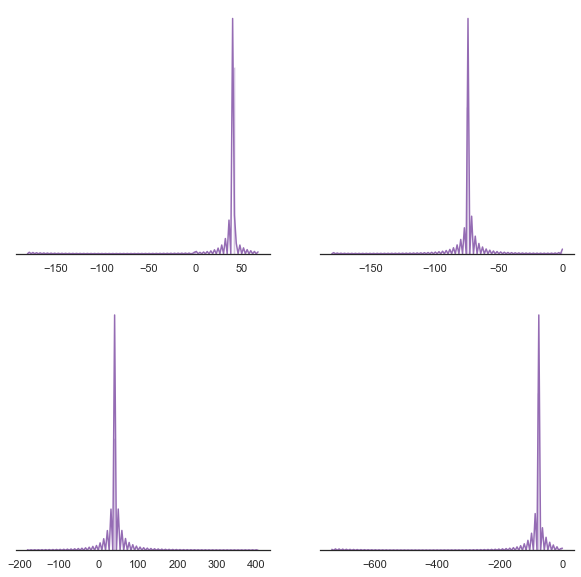

In [73]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="m",bins =100, ax=axes[0,1])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="m",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
# plt.tight_layout()


As can be seen from the previous graphs, there are outliers in longitude and latitude locations. Some locations are very far apart from NYC. Usually, The outliers lie beyond 3 sigma can be removed because of no statistical significant. However, in my opinion there are some other insights that possiblly came from the outliers. Thus, the outliers and the remains observation will be treated seperately.


In [144]:
#Calculate quantile
quantile_df = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].quantile([0.025,0.975])
quantile_df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0.025,-74.009357,40.646673,-74.010314,40.647582
0.975,-73.789252,40.795341,-73.819998,40.805642


In [146]:
# Select data in quantile (5,95) range only
filtered_df = df.copy()
filtered_df = filtered_df[(filtered_df.pickup_longitude> quantile_df.iloc[0]['pickup_longitude']) & (filtered_df.pickup_longitude < quantile_df.iloc[1]['pickup_longitude'])]
filtered_df = filtered_df[(filtered_df.dropoff_longitude > quantile_df.iloc[0]['dropoff_longitude']) & (filtered_df.dropoff_longitude < quantile_df.iloc[1]['dropoff_longitude'])]
filtered_df = filtered_df[(filtered_df.pickup_latitude> quantile_df.iloc[0]['pickup_latitude']) & (filtered_df.pickup_latitude < quantile_df.iloc[1]['pickup_latitude'])]
filtered_df = filtered_df[(filtered_df.dropoff_latitude> quantile_df.iloc[0]['dropoff_latitude']) & (filtered_df.dropoff_latitude < quantile_df.iloc[1]['dropoff_latitude'])]

2250000 1960487


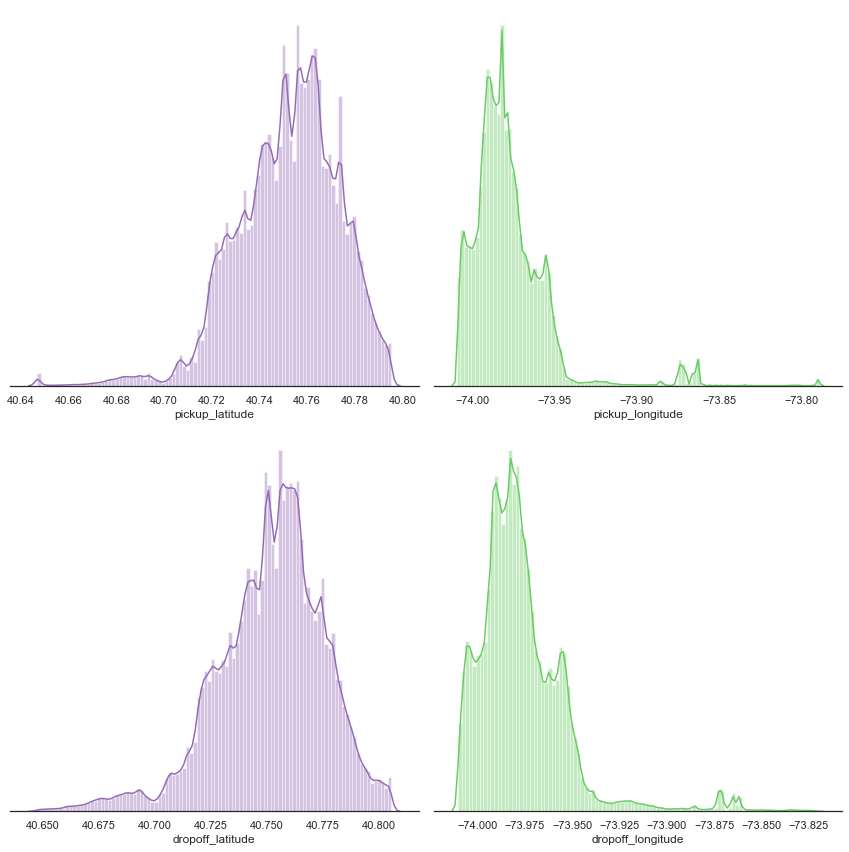

In [147]:

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(filtered_df['pickup_latitude'].values, axlabel= 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(filtered_df['pickup_longitude'].values, axlabel = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(filtered_df['dropoff_latitude'].values, axlabel = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(filtered_df['dropoff_longitude'].values, axlabel = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
print(df.shape[0], filtered_df.shape[0])
plt.show()

### Visualize pickup and dropoff map

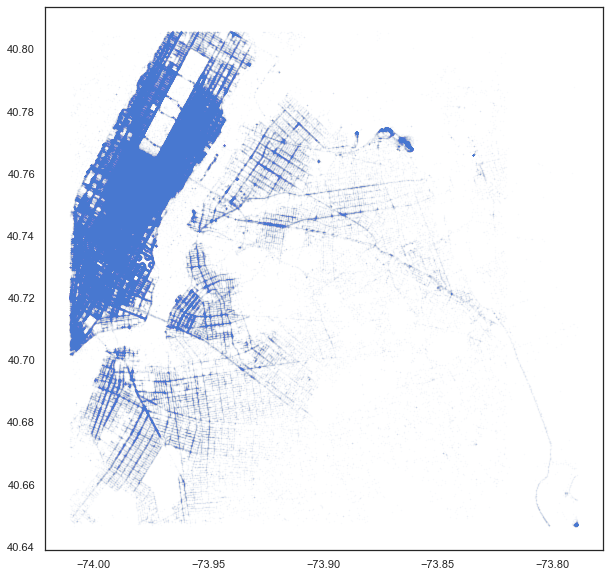

In [166]:
longitude = list(filtered_df.pickup_longitude) + list(filtered_df.dropoff_longitude)
latitude = list(filtered_df.pickup_latitude) + list(filtered_df.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.5, markersize = 0.05)
plt.show()

Manhattan island is the place where located most pickup and dropoff trip.

In [170]:
loc_df = pd.DataFrame()
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude

### Clustering

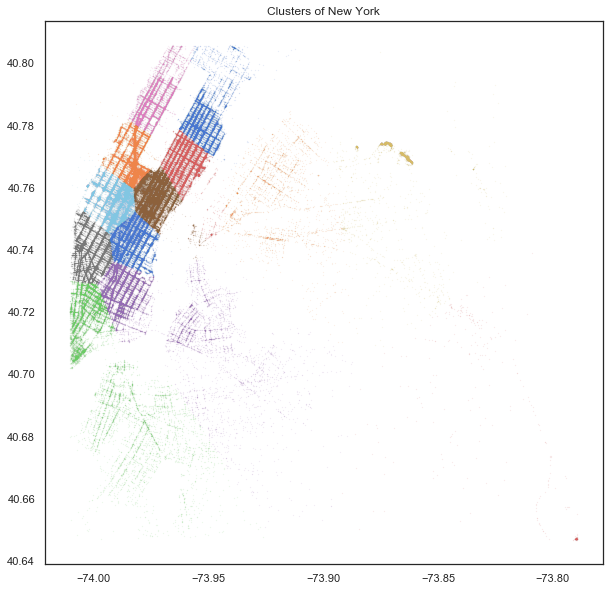

In [171]:
kmeans = KMeans(n_clusters=15, random_state=1996, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

loc_df = loc_df.sample(200000)
plt.figure(figsize = (10,10))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.3, markersize = 0.3)

plt.title('Clusters of New York')
plt.show()


As we can see, the clustering results in a partition which is somewhat similar to the way NY is divided into different neighborhoods. 
(*_Image below_*)

In [178]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Manhattan_neighborhoods.png/1920px-Manhattan_neighborhoods.png")

## 3.2. Trip duration (log) for each vendor

2250000


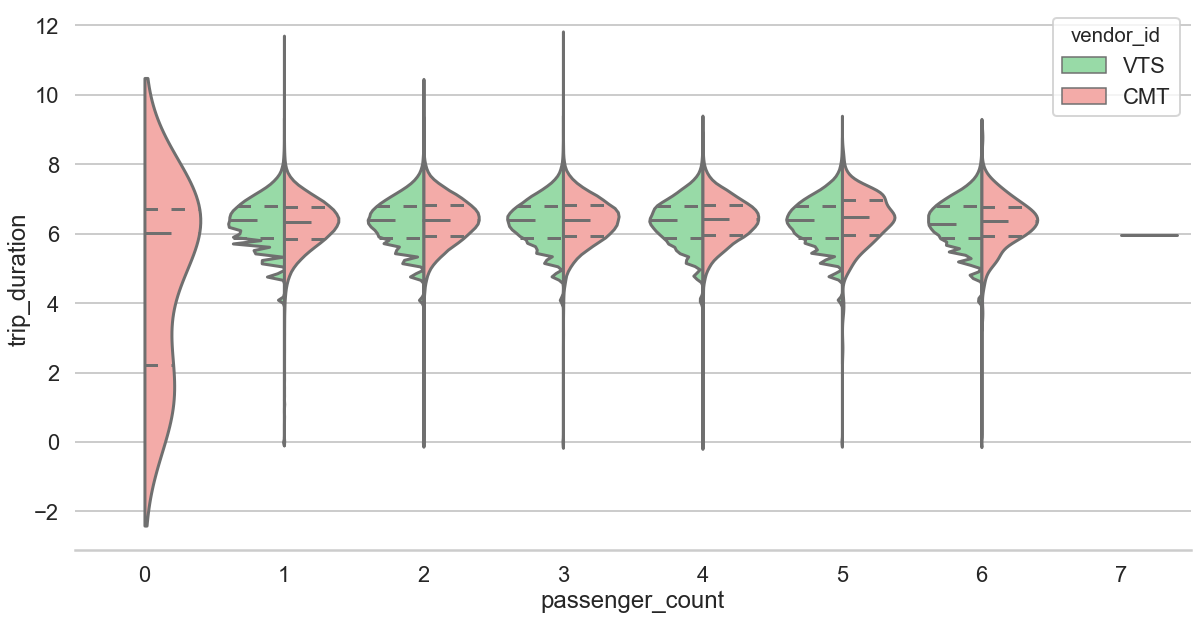

In [191]:

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context("poster")
filtered_df_new = filtered_df.copy()
filtered_df_new['trip_duration']= filtered_df_new['trip_duration'].apply(lambda x: 0 if x == 0 else np.log(x))
fig, ax = plt.subplots()

fig.set_size_inches(20, 10)
sns.violinplot(x="passenger_count", y="trip_duration", hue="vendor_id", data=filtered_df_new, split=True,
               inner="quart",palette={"VTS": "g", "CMT": "r"})

sns.despine(left=True)
print(df.shape[0])

__Findings:__
    1. Distributiions are similar for both vendors but only vendor CMT has trips with zeros passengers and few of these trips have negative time as well.
    This could be error from recording and should be removed from dataset before making model.
    2. There are very less number of trips with passenger count >= 7

## 3.3. AVERAGE TRIP DURATIONS AND TRIP DISTANCES

### Trip duration per weekday

In [201]:
duration_df = filtered_df.groupby('weekday').trip_duration.mean().reset_index()
duration_df

,weekday,trip_duration
0,Fri,730.084868
1,Mon,649.501233
2,Sat,634.819036
3,Sun,607.964541
4,Thurs,730.914256
5,Tues,734.221284
6,Wed,693.202074


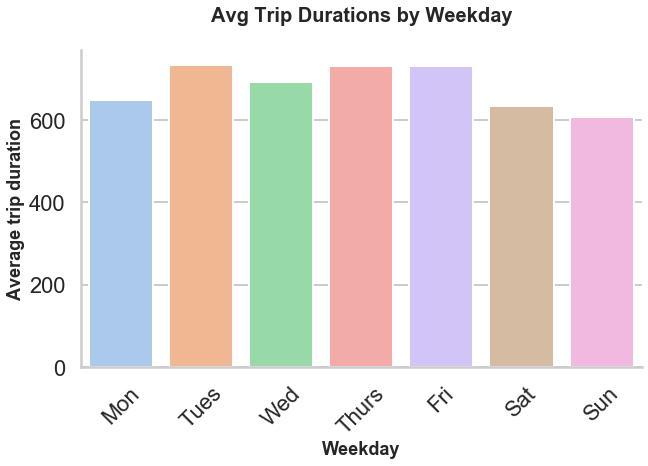

In [202]:
weekday_list = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
g = sns.catplot(kind='bar',        # Boxplot
               y='trip_duration',       # Y-axis - values for boxplot
               x='weekday',        # X-axis - first factor
               #estimator = np.sum, 
               data=duration_df,        # Dataframe 
               height=6,            # Figure size (x100px)      
               aspect=1.6,        # Width = size * aspect 
               order = list(weekday_list),
               legend_out=False) 
plt.title('Avg Trip Durations by Weekday\n', weight = 'bold', size = 20)
plt.xlabel('Weekday', size = 18,weight = 'bold')
plt.ylabel('Average trip duration', size = 18,weight = 'bold')
g.set_xticklabels(rotation=45)

### Trip duration by Hour and Day of Week

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(4.847999999999999, 0.5, 'Total Distance')

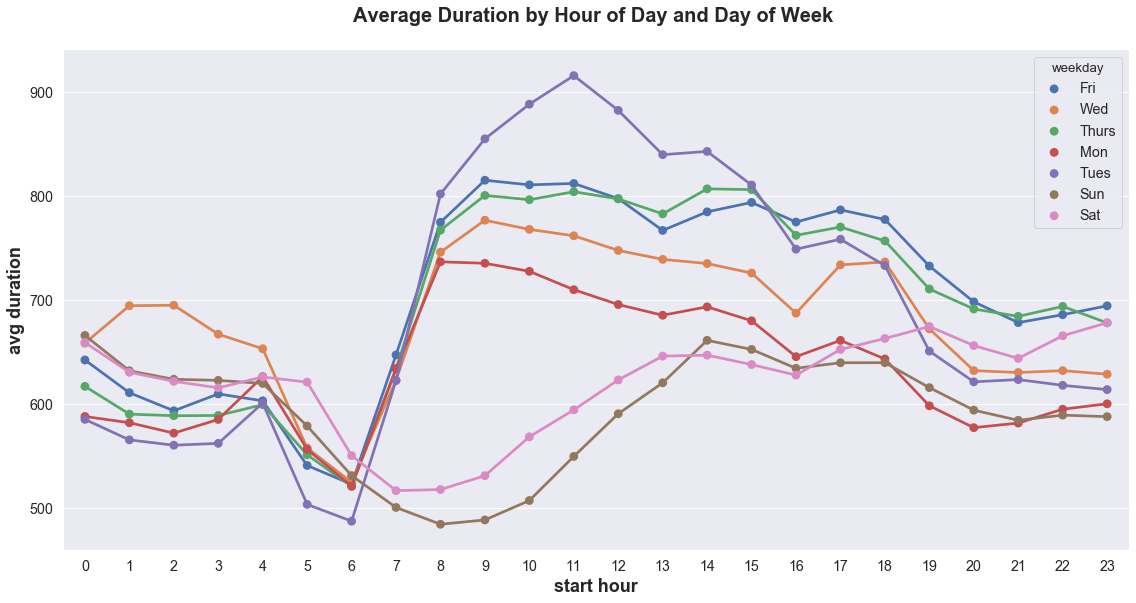

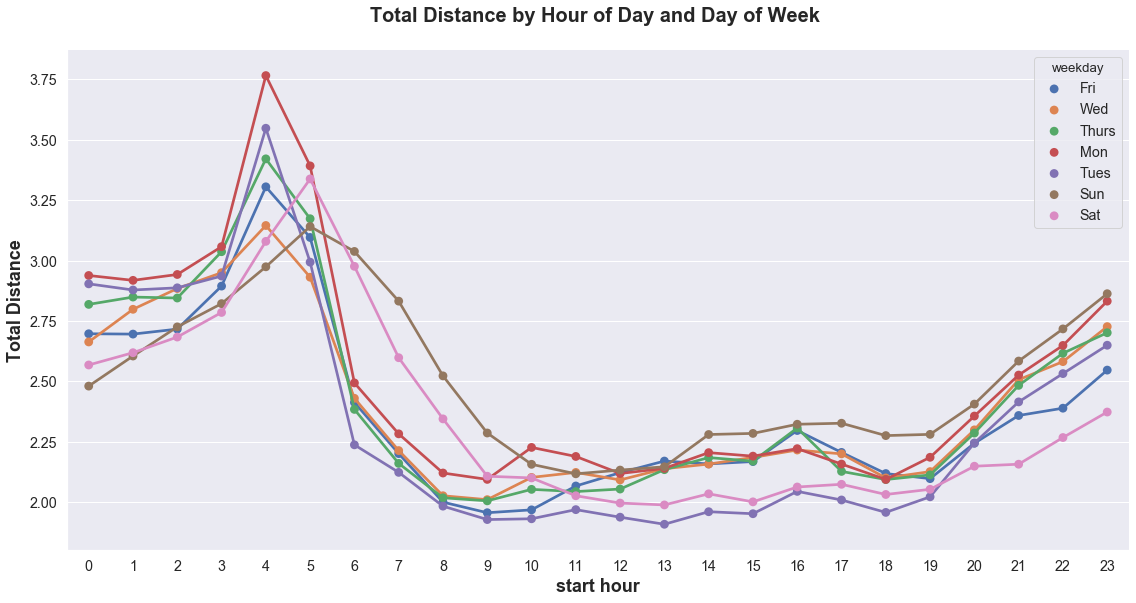

In [229]:
sns.set(font_scale=1.3)
ax1 = sns.factorplot('pickup_hour', 
                   'trip_duration', 
                   hue = 'weekday', 
                   estimator = np.mean, 
                   data = filtered_df, 
                   size = 8, 
                   aspect = 2, 
                    ci=None,
                   legend_out=False
                  )
plt.title('Average Duration by Hour of Day and Day of Week \n',weight='bold', size = 20)
plt.xlabel('start hour', size = 18,weight = 'bold')
plt.ylabel('avg duration', size = 18,weight = 'bold')

#g.set_xticklabels(rotation=60)

sns.set(font_scale=1.3)
ax2 = sns.factorplot('pickup_hour', 
                   'trip_distance', 
                   hue = 'weekday', 
                   estimator = np.mean, 
                   data = filtered_df, 
                   size = 8, 
                   aspect = 2, 
                   ci=None,
                   legend_out=False
                  )
plt.title('Total Distance by Hour of Day and Day of Week \n',weight='bold', size = 20)
plt.xlabel('start hour', size = 18,weight = 'bold')
plt.ylabel('Total Distance', size = 18,weight = 'bold')
#g.set_xticklabels(rotation=60)


__Findings :__
    <li> Overall, trip durations during weekend are below its during the working day. </li>
    <li> During a day, there is an increase in distances from 3 A.M to 5 A.M. However, there is a sharp decrease in trip durations. Thus, it might reflect the good traffic condition. </li>
    <li> From 5 A.M to 10 A.M, the average trip distances reduce drastically but its duration rockets for 1.5 times. It could be a sign of traffic jam.</li> 

## 3.4. FARES

### Fares and trip distances

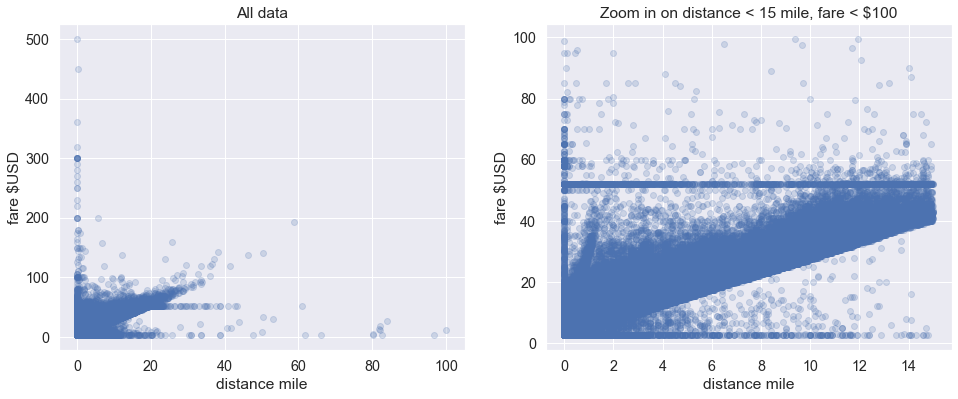

In [233]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(filtered_df.trip_distance, filtered_df.fare_amount, alpha=0.2)
axs[0].set_xlabel('distance mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('All data')

# zoom in on part of data
idx = (filtered_df.trip_distance < 15) & (filtered_df.fare_amount < 100)
axs[1].scatter(filtered_df[idx].trip_distance, filtered_df[idx].fare_amount, alpha=0.2)
axs[1].set_xlabel('distance mile')
axs[1].set_ylabel('fare $USD')
axs[1].set_title('Zoom in on distance < 15 mile, fare < $100');

__Findings :__
    <li> As can be seen from the graph, there is a clear positive correlation between distance and fares. </li>
    <li> There are some trips which are at fix price (around $50). These trips might come from some fix locations. </li> 


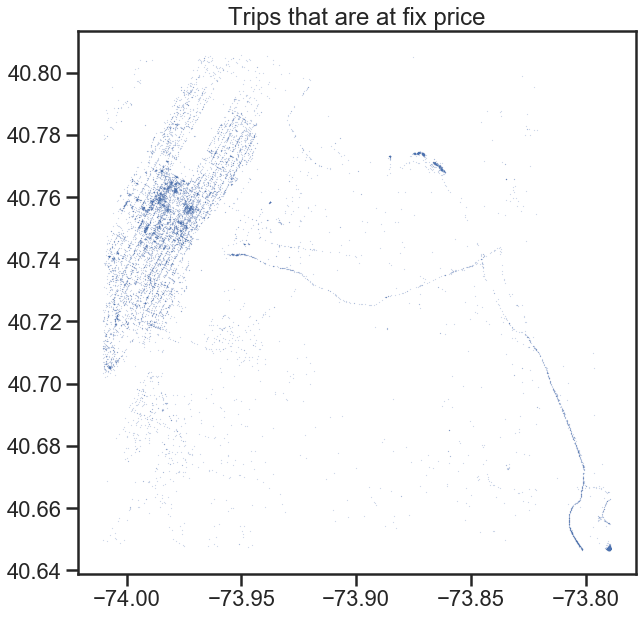

In [265]:
tmp_df = filtered_df[(filtered_df.fare_amount >= 49) & (filtered_df.fare_amount <= 100)]
longitude = list(tmp_df.pickup_longitude) + list(tmp_df.dropoff_longitude)
latitude = list(tmp_df.pickup_latitude) + list(tmp_df.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 1, markersize = 0.2)
plt.title('Trips that are at fix price')
plt.show()

These trips could be the ones from/to the JFK airport.

### Fares and Pickup Hour

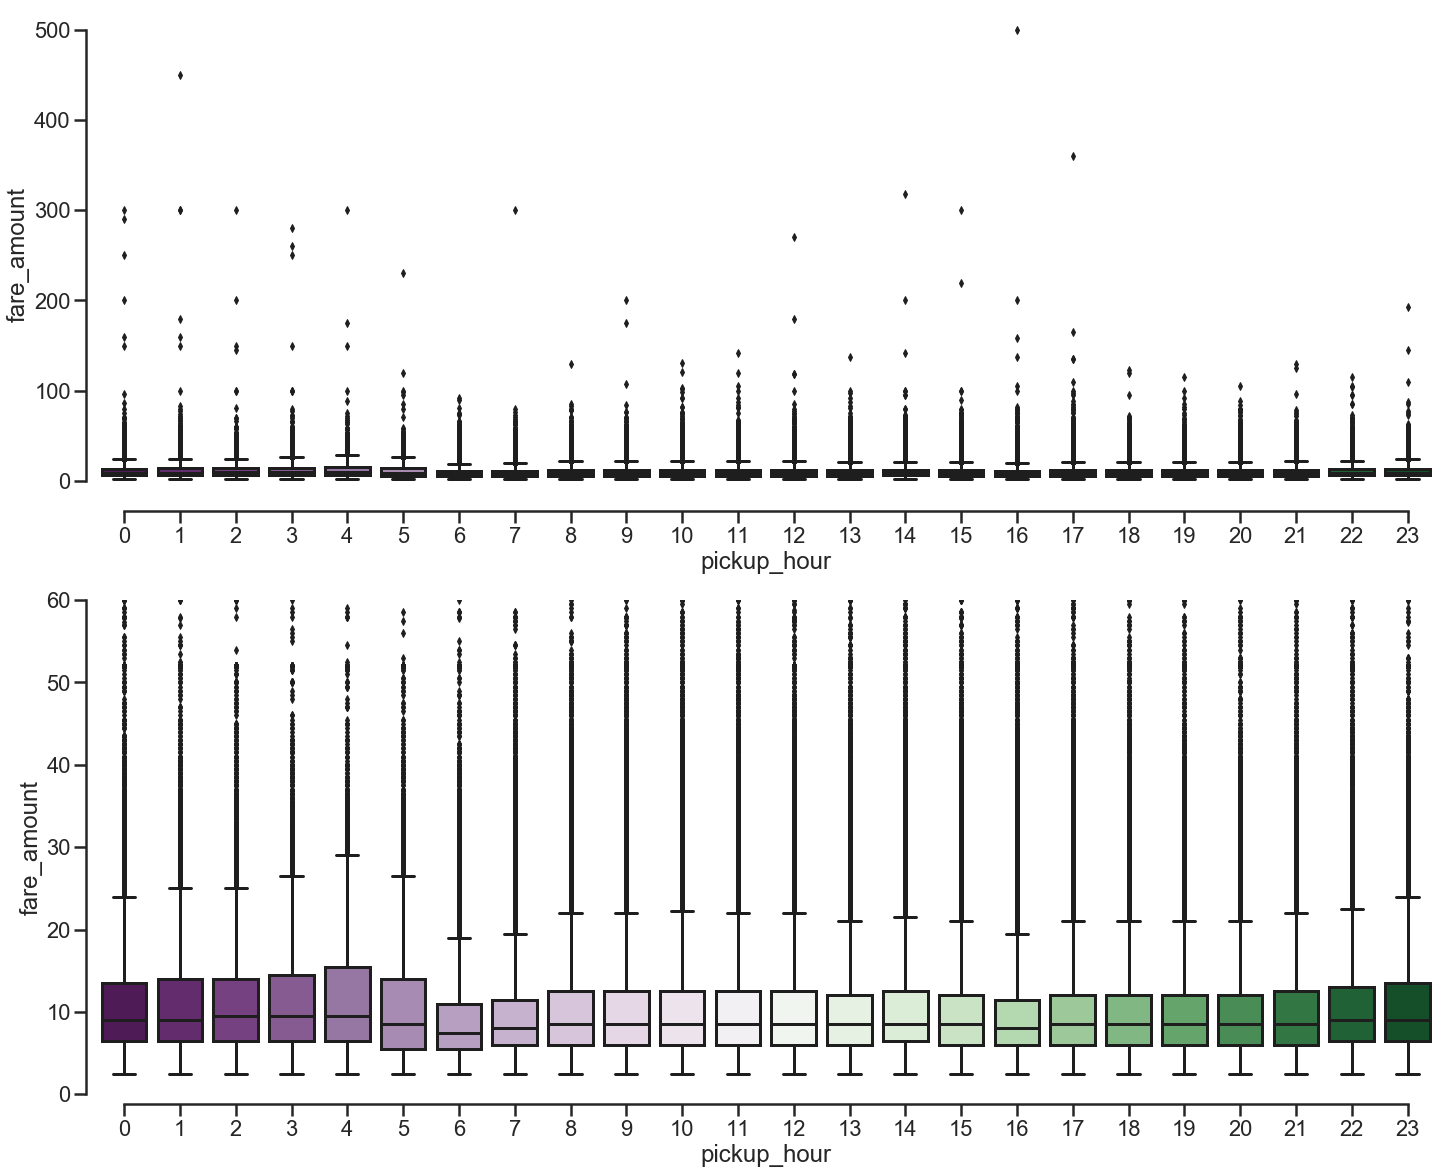

In [259]:
fig, axs = plt.subplots(2, 1, figsize=(24,20))
sns.set(style="ticks")
sns.set_context("poster")
sns.boxplot(x="pickup_hour", y="fare_amount", data=filtered_df, palette="PRGn",ax = axs[0])
plt.ylim(0, 100)
# sns.despine(offset=10, trim=True)

# print(train_data.trip_duration.max())
# end = time.time()
# print("Time taken by above cell is {}.".format(end-start))

# zoom in on part of data
sns.set(style="ticks")
sns.set_context("poster")
sns.boxplot(x="pickup_hour", y="fare_amount", data=filtered_df, palette="PRGn",ax = axs[1])
plt.ylim(0, 60)
sns.despine(offset=10, trim=True)



In [52]:
df[df.trip_distance == 0].nunique()

vendor_id                 2
pickup_datetime       12065
dropoff_datetime      12085
passenger_count          10
trip_distance             1
pickup_longitude       9054
pickup_latitude        9000
rate_code                 8
store_and_fwd_flag        2
dropoff_longitude      7479
dropoff_latitude       7416
payment_type              5
fare_amount             458
surcharge                 6
mta_tax                   2
tip_amount              435
tolls_amount             44
total_amount           1030
pickup_day                7
pickup_hour              24
pickup_month              2
trip_duration           746
weekday                   7
month                     2
dtype: int64

# The Model parts are not included